# LINEAR REGRESSION

## Human Resorurces: Salary model

## Part 1: Data preparation

We are going to generate a linear regression model that explains the salary in a particular company. First we are going to upload the data

In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [3]:
import requests
excel_url = 'https://docs.google.com/spreadsheets/d/1SDfHN0eVVcPCQE2VIktQI28Sek3RDAu1sM343suPfV8/export?format=xlsx'
response = requests.get(excel_url)
response.raise_for_status()  # Ensure the request was successful
with open('sheet.xlsx', 'wb') as file:
    file.write(response.content)
df = pd.read_excel('sheet.xlsx')

Let's see what type of object we have imported, to verify that it is a DataFrame

In [4]:
type(df)

pandas.core.frame.DataFrame

Now let's look at the data we have loaded (first 10 rows)

In [5]:
df.head(n=10)

,Salary,Gender,Category,Years_Experience,Performance
0,257231.753597,Male,Executive,34,10
1,90522.829027,Female,Technician,6,7
2,150561.962239,Male,Middle_Manager,25,7
3,130006.669909,Female,Middle_Manager,23,5
4,212871.076731,Female,Executive,37,6
5,109418.187070,Male,Technician,34,6
6,147486.137638,Female,Middle_Manager,35,5
7,90906.687721,Male,Technician,3,8
8,98806.857991,Female,Technician,24,7
9,103282.387715,Female,Technician,34,6


We will now summarize its contents: what variables it contains and what type of variable each variable is

In [6]:
df.describe()

,Salary,Years_Experience,Performance
count,2825.000000,2825.000000,2825.000000
mean,107563.871671,20.215575,5.974159
std,40651.806132,11.044395,1.050953
min,45246.730076,0.000000,3.000000
25%,80325.931321,11.000000,5.000000
50%,95421.997784,21.000000,6.000000
75%,122755.429435,29.000000,7.000000
max,265631.179431,45.000000,10.000000


In [7]:
df.dtypes

,0
Salary,float64
Gender,object
Category,object
Years_Experience,int64
Performance,int64


The variables "Gender" and "Category" are categorical, so we are going to transform them into this type of data.

In [8]:
df['Gender'] = df['Gender'].astype('category')
df['Category'] = df['Category'].astype('category')
df.dtypes

,0
Salary,float64
Gender,category
Category,category
Years_Experience,int64
Performance,int64


We transform the categorical variables into dichotomous variables in order to incorporate them into the regression model.

In [9]:
df_Gender = pd.get_dummies(df["Gender"])
df_Category = pd.get_dummies(df["Category"])

df = pd.concat((df, df_Gender,df_Category), axis=1)

df.head(n=10)

,Salary,Gender,Category,Years_Experience,Performance,Female,Male,Executive,Middle_Manager,Technician
0,257231.753597,Male,Executive,34,10,False,True,True,False,False
1,90522.829027,Female,Technician,6,7,True,False,False,False,True
2,150561.962239,Male,Middle_Manager,25,7,False,True,False,True,False
3,130006.669909,Female,Middle_Manager,23,5,True,False,False,True,False
4,212871.076731,Female,Executive,37,6,True,False,True,False,False
5,109418.187070,Male,Technician,34,6,False,True,False,False,True
6,147486.137638,Female,Middle_Manager,35,5,True,False,False,True,False
7,90906.687721,Male,Technician,3,8,False,True,False,False,True
8,98806.857991,Female,Technician,24,7,True,False,False,False,True
9,103282.387715,Female,Technician,34,6,True,False,False,False,True


## Part 2: Basic exploratory analysis of the data

In the case of continuous numerical variables, it is appropriate to use a histogram.

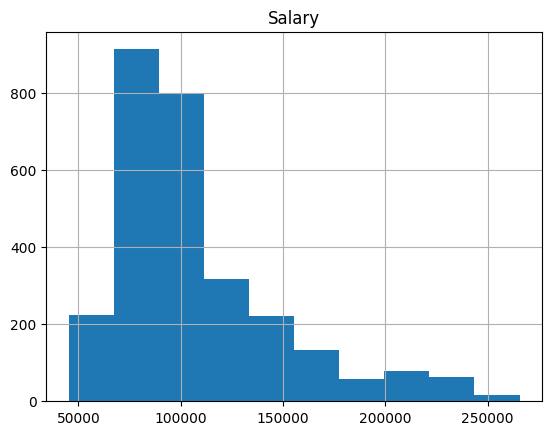

In [10]:
df.hist(column="Salary");

In the case of discrete numerical variables and categorical variables, it is appropriate to use a barplot or a pie chart.
That is the case for "Performance" (discrete numerical variable)

In [11]:
Table_Performance = pd.crosstab(index=df['Performance'], columns='count')
Table_Performance

col_0,count
Performance,
3,17
4,185
5,695
6,1107
7,621
8,179
9,20
10,1


Lets plot the barplot (rot=0 means taht labels in x-axis will not be rotated)

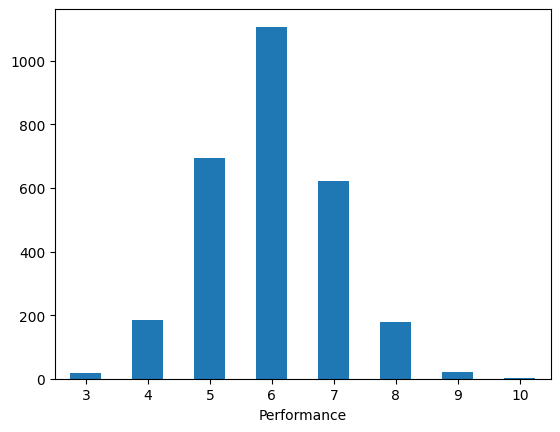

In [12]:
barplot = Table_Performance.plot.bar(rot=0, legend=False)

We can also plot an aggregated barplot (by other categorical variable as Gender)

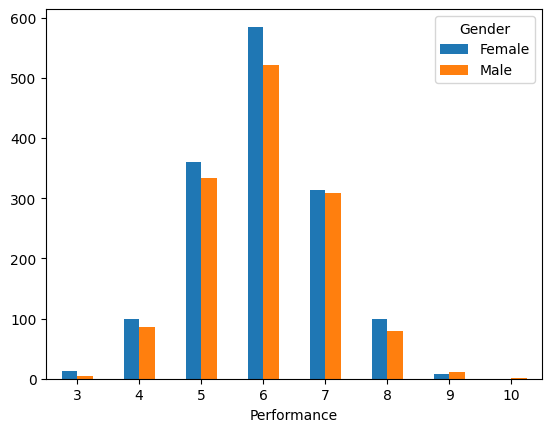

In [13]:
Table_Performance_by_Gender = pd.crosstab(df.Performance,df.Gender)
barplot = Table_Performance_by_Gender.plot.bar(rot=0)

That is also the case for "Category" (categorical ordinal variable)

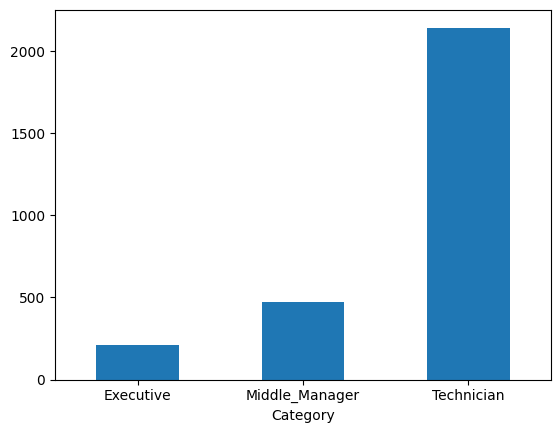

In [14]:
Table_Category = pd.crosstab(index=df['Category'], columns='count')
barplot = Table_Category.plot.bar(rot=0, legend=False)

Same data in a pie chart

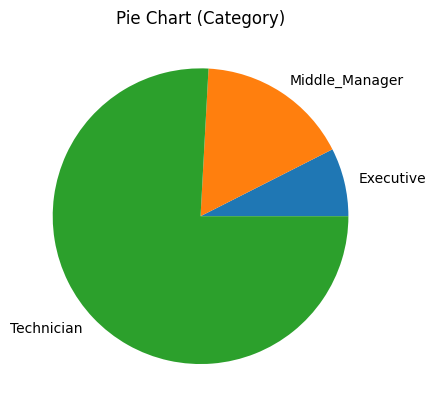

In [15]:
Table_Category.plot.pie(subplots=True,legend=False)
plt.gca().set(title='Pie Chart (Category)', ylabel='');

## Part 3: First model (Simple Linear Regression)

Now, lets fit the model:  y ~ Bo + B1 x + u

In [16]:
# Define dependent variable
y = df['Salary']

# Define independent variable
x = df[['Years_Experience']]

# Add constant (beta 0) to predictor variables
x = sm.add_constant(x) #  we need to add the intercept term explicitly

#fit linear regression model
model_1 = sm.OLS(y, x)
regr_results_model_1 = model_1.fit()

print(regr_results_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2802.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:32:25   Log-Likelihood:                -33015.
No. Observations:                2825   AIC:                         6.603e+04
Df Residuals:                    2823   BIC:                         6.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.505e+04   1130.488  

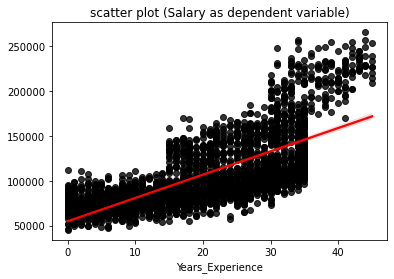

In [ ]:
sns.regplot(x='Years_Experience', y='Salary', data=df,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.gca().set(title='scatter plot (Salary as dependent variable)', ylabel='');

Apparently we have a problem of structural stability in the last period (years of experience over 35).
In addition, we can intuit a certain nonlinear behavior

Now, let's check the normality of the residuals

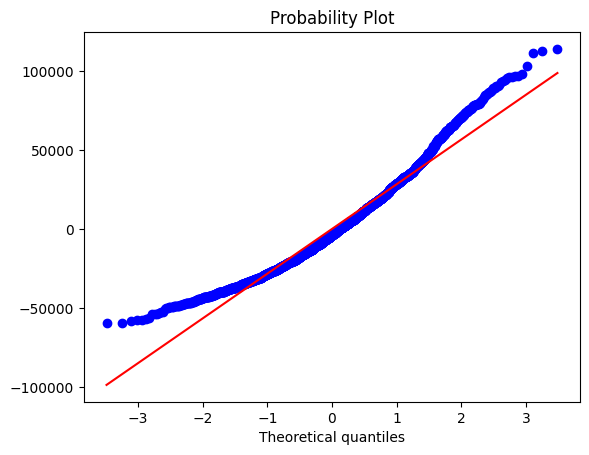

In [17]:
res = regr_results_model_1.resid # residuals
stats.probplot(res, dist="norm", plot=plt)
plt.gca().set(title='Probability Plot', ylabel='');

We seem to have a problem. Let's see the Shapiro-Wilk normality test

In [18]:
stats.shapiro(res)

ShapiroResult(statistic=0.9633112659755588, pvalue=3.3725030110076284e-26)

Indeed, the residues are not normal (p-value < 0.05)

## Part 4: Second model (Multiple Linear Regression)

From the first model we already know that we must include a quadratic term in the years of experience.

Additionaly we know that we have a problem of structural stability in the last period (years of experience over 35). Is it possible that the variable performance requires an interaction with category? Let's check it

In [19]:
y = df['Salary']
x = df[['Performance']]

# Add constant (beta 0) to predictor variables
x = sm.add_constant(x) #  we need to add the intercept term explicitly

#fit linear regression model
model_1_2 = sm.OLS(y, x)
regr_results_model_1_2 = model_1_2.fit()

print(regr_results_model_1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     376.7
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           7.11e-79
Time:                        13:32:39   Log-Likelihood:                -33812.
No. Observations:                2825   AIC:                         6.763e+04
Df Residuals:                    2823   BIC:                         6.764e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.827e+04   4147.943      6.816      

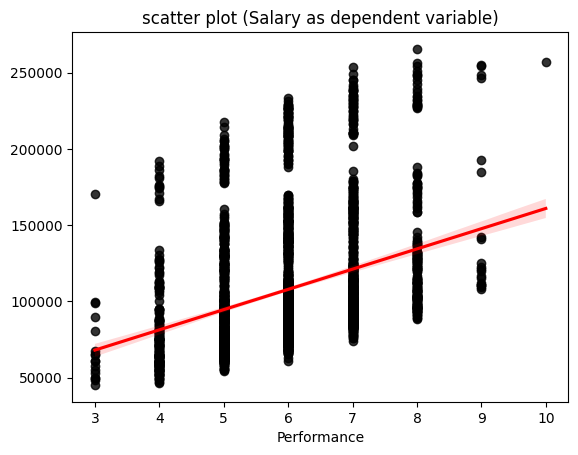

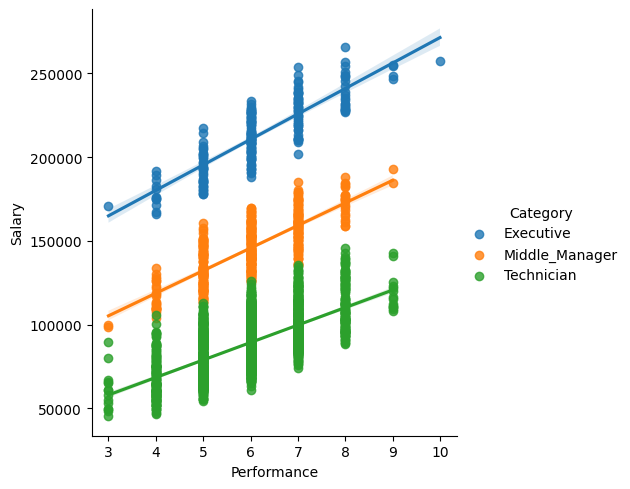

In [20]:
sns.regplot(x='Performance', y='Salary', data=df,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.gca().set(title='scatter plot (Salary as dependent variable)', ylabel='');
sns.lmplot(x="Performance", y="Salary", hue="Category", data=df);

Indeed, the performance variable probably requires an interaction with professional category.

Now, lets fit the model:  y ~ Bo + B1 x1 + B2 x2 + ... + u
In this case
Salary = B0 + B1 Years_Experience + B2 Years_Experience^2 + B3 Performance + B4 Female + B5 Middle_Manager + B6 Executive + B7 Performance x Middle_Manager + B8 Performance x Executive +u

In [21]:
Years_Experience2 = (df['Years_Experience'])*(df['Years_Experience'])
df["Years_Experience2"] = Years_Experience2

Interaction_Performance_Middle_Manager = (df['Performance'])*(df['Middle_Manager'])
df["Interaction_Performance_Middle_Manager"] = Interaction_Performance_Middle_Manager

Interaction_Performance_Executive = (df['Performance'])*(df['Executive'])
df["Interaction_Performance_Executive"] = Interaction_Performance_Executive

df.head(n=10)

,Salary,Gender,Category,Years_Experience,Performance,Female,Male,Executive,Middle_Manager,Technician,Years_Experience2,Interaction_Performance_Middle_Manager,Interaction_Performance_Executive
0,257231.753597,Male,Executive,34,10,False,True,True,False,False,1156,0,10
1,90522.829027,Female,Technician,6,7,True,False,False,False,True,36,0,0
2,150561.962239,Male,Middle_Manager,25,7,False,True,False,True,False,625,7,0
3,130006.669909,Female,Middle_Manager,23,5,True,False,False,True,False,529,5,0
4,212871.076731,Female,Executive,37,6,True,False,True,False,False,1369,0,6
5,109418.187070,Male,Technician,34,6,False,True,False,False,True,1156,0,0
6,147486.137638,Female,Middle_Manager,35,5,True,False,False,True,False,1225,5,0
7,90906.687721,Male,Technician,3,8,False,True,False,False,True,9,0,0
8,98806.857991,Female,Technician,24,7,True,False,False,False,True,576,0,0
9,103282.387715,Female,Technician,34,6,True,False,False,False,True,1156,0,0


In [23]:
y = df['Salary']
x = df[['Years_Experience','Years_Experience2','Performance','Female','Middle_Manager',
        'Executive','Interaction_Performance_Middle_Manager','Interaction_Performance_Executive']]
for column in x.select_dtypes(include='bool'):
    x[column] = x[column].astype(int)

# Add constant (beta 0) to predictor variables
x = sm.add_constant(x) #  we need to add the intercept term explicitly

#fit linear regression model
model_2 = sm.OLS(y, x)
regr_results_model_2 = model_2.fit()

print(regr_results_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.358e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:33:34   Log-Likelihood:                -28029.
No. Observations:                2825   AIC:                         5.608e+04
Df Residuals:                    2816   BIC:                         5.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

<ipython-input-23-7f919cc03470>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype(int)
<ipython-input-23-7f919cc03470>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype(int)
<ipython-input-23-7f919cc03470>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

We get this message: "The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems"
Let's check multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

                                  feature        VIF
0                                   const  51.696670
1                        Years_Experience  16.387363
2                       Years_Experience2  18.733621
3                             Performance   1.319796
4                                  Female   1.004239
5                          Middle_Manager  37.296461
6                               Executive  32.100414
7  Interaction_Performance_Middle_Manager  37.407883
8       Interaction_Performance_Executive  31.499666


Clearly we have a multicollinearity problem: many VIFs are greater than 5 --> INFERENCE IS NOT VALID

This is typical when we incorporate quadratic terms or interactions into a regression model. Fortunately the solution is simple in these cases: center each numerical variable

In [25]:
from statistics import mean

Years_Experience_centered = (df['Years_Experience']) - mean(df['Years_Experience'])
df["Years_Experience_centered"] = Years_Experience_centered

Performance_centered = (df['Performance']) - mean(df['Performance'])
df["Performance_centered"] = Performance_centered

Years_Experience_centered2 = (df['Years_Experience_centered'])*(df['Years_Experience_centered'])
df["Years_Experience_centered2"] = Years_Experience_centered2

Interaction_Performance_Middle_Manager_centered  = (df['Performance_centered'])*(df['Middle_Manager'])
df["Interaction_Performance_Middle_Manager_centered"] = Interaction_Performance_Middle_Manager_centered

Interaction_Performance_Executive_centered  = (df['Performance_centered'])*(df['Executive'])
df["Interaction_Performance_Executive_centered"] = Interaction_Performance_Executive_centered

df.head(n=10)

,Salary,Gender,Category,Years_Experience,Performance,Female,Male,Executive,Middle_Manager,Technician,Years_Experience2,Interaction_Performance_Middle_Manager,Interaction_Performance_Executive,Years_Experience_centered,Performance_centered,Years_Experience_centered2,Interaction_Performance_Middle_Manager_centered,Interaction_Performance_Executive_centered
0,257231.753597,Male,Executive,34,10,False,True,True,False,False,1156,0,10,13.784425,4.025841,190.010366,0.000000,4.025841
1,90522.829027,Female,Technician,6,7,True,False,False,False,True,36,0,0,-14.215575,1.025841,202.082579,0.000000,0.000000
2,150561.962239,Male,Middle_Manager,25,7,False,True,False,True,False,625,7,0,4.784425,1.025841,22.890720,1.025841,0.000000
3,130006.669909,Female,Middle_Manager,23,5,True,False,False,True,False,529,5,0,2.784425,-0.974159,7.753021,-0.974159,-0.000000
4,212871.076731,Female,Executive,37,6,True,False,True,False,False,1369,0,6,16.784425,0.025841,281.716915,0.000000,0.025841
5,109418.187070,Male,Technician,34,6,False,True,False,False,True,1156,0,0,13.784425,0.025841,190.010366,0.000000,0.000000
6,147486.137638,Female,Middle_Manager,35,5,True,False,False,True,False,1225,5,0,14.784425,-0.974159,218.579216,-0.974159,-0.000000
7,90906.687721,Male,Technician,3,8,False,True,False,False,True,9,0,0,-17.215575,2.025841,296.376030,0.000000,0.000000
8,98806.857991,Female,Technician,24,7,True,False,False,False,True,576,0,0,3.784425,1.025841,14.321871,0.000000,0.000000
9,103282.387715,Female,Technician,34,6,True,False,False,False,True,1156,0,0,13.784425,0.025841,190.010366,0.000000,0.000000


In [27]:
y = df['Salary']
x = df[['Years_Experience_centered','Years_Experience_centered2','Performance_centered','Female','Middle_Manager',
        'Executive','Interaction_Performance_Middle_Manager_centered','Interaction_Performance_Executive_centered']]
for column in x.select_dtypes(include='bool'):
    x[column] = x[column].astype(int)
x = sm.add_constant(x) #  we need to add the intercept term explicitly

#fit linear regression model
model_3 = sm.OLS(y, x)
regr_results_model_3 = model_3.fit()

print(regr_results_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.358e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:33:56   Log-Likelihood:                -28029.
No. Observations:                2825   AIC:                         5.608e+04
Df Residuals:                    2816   BIC:                         5.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

<ipython-input-27-ec0dc1ac71bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype(int)
<ipython-input-27-ec0dc1ac71bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[column] = x[column].astype(int)
<ipython-input-27-ec0dc1ac71bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Let's check multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

                                           feature       VIF
0                                            const  3.500238
1                        Years_Experience_centered  1.530510
2                       Years_Experience_centered2  1.437131
3                             Performance_centered  1.319796
4                                           Female  1.004239
5                                   Middle_Manager  1.121373
6                                        Executive  1.839270
7  Interaction_Performance_Middle_Manager_centered  1.196690
8       Interaction_Performance_Executive_centered  1.163171


The problem is solved: all VIFs are below 5

Let's check heterokedasticity (White test)

In [29]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(regr_results_model_3.resid,  regr_results_model_3.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 22.671237696643985, 'Test Statistic p-value': 0.8285302649400446, 'F-Statistic': 0.7534618942230339, 'F-Test p-value': 0.8303356036004149}


We don't have a problem of heteroscedasticity (p-value > 0.05). So, we can continue
Let's check the normality of the residuals

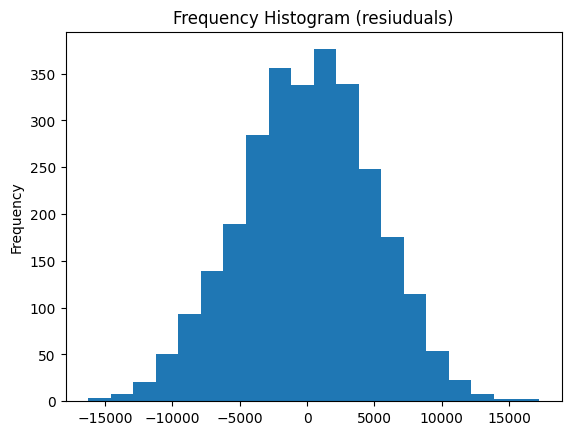

In [30]:
res = regr_results_model_3.resid # residuals
plt.hist(res, bins=20)
plt.gca().set(title='Frequency Histogram (resiuduals)', ylabel='Frequency');

ShapiroResult(statistic=0.9989177346502071, pvalue=0.07355510883563748)

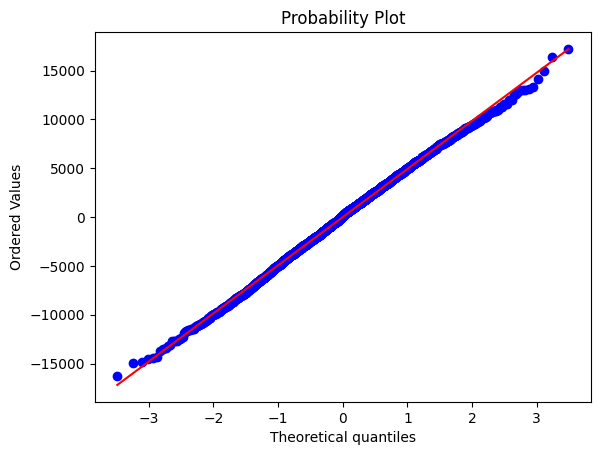

In [31]:
stats.probplot(res, dist="norm", plot=plt)
stats.shapiro(res)

All seems correct: residuals are normal